# 1. 텐서플로우
텐서플로우(TensorFlow)는 구글에서 개발한 오픈소스 머신러닝 라이브러리로, 수치 계산과 딥러닝 모델 구축을 위한 강력한 기능을 제공합니다.  
 데이터 흐름 그래프(Data Flow Graph)를 기반으로 작동하며, 노드(Node)는 연산을, 엣지(Edge)는 다차원 배열인 텐서(Tensor)를 나타냅니다.  
  CPU, GPU, TPU 등 다양한 하드웨어에서 효율적으로 작동하며, 특히 대규모 신경망 학습과 추론에 적합합니다.  
   텐서플로우는 파이썬을 주로 사용하며, 직관적인 고수준 API인 Keras를 포함하고 있어 모델을 쉽고 빠르게 구축할 수 있는 환경을 제공합니다.

### 1. 텐서란?
TensorFlow에서의 텐서(Tensor)는 다차원 배열을 표현하는 핵심 데이터 구조로, 기능적으로는 파이썬의 넘파이(NumPy) 배열과 매우 유사합니다. 그러나 단순한 배열을 넘어서, 텐서는 딥러닝 모델 학습에 필수적인 자동 미분(automatic differentiation) 기능을 지원하며, 이를 통해 모델 학습 시 역전파(backpropagation)를 자동으로 처리할 수 있습니다. 텐서는 GPU나 TPU와 같은 다양한 장치에서 효율적으로 계산될 수 있도록 설계되어 있으며, 다음과 같은 기본 속성을 가집니다:

- 모양(shape): 텐서가 가지는 차원의 크기를 나타내며, 예를 들어 (3, 4)는 3행 4열의 2차원 텐서를 의미합니다.
- 자료형(data type): 텐서에 저장되는 데이터의 타입으로, float32, int32 등 다양한 타입이 있습니다.
- 저장된 장치(device): 텐서가 현재 어느 하드웨어(CPU, GPU 등)에 저장되어 있는지를 나타냅니다.

In [1]:
import tensorflow as tf

In [6]:
data = [
    [1, 2],
    [3, 4]
]
x = tf.constant(data)

print(x)
'''
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
 '''
print(tf.rank(x)) # 차원 출력
# f.Tensor(2, shape=(), dtype=int32)

data = tf.constant("String")
print(data)
# tf.Tensor(b'String', shape=(), dtype=string) : 스칼라값이기 때문에 shape가 없는 것


tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(b'String', shape=(), dtype=string)


In [7]:
a = tf.constant([5])
b = tf.constant([7])

c = (a + b).numpy() # 넘파이로 변환
print(c) # [12]
print(type(c)) # <class 'numpy.ndarray'>

result = c * 10
tensor = tf.convert_to_tensor(result) # 텐서로 변환
print(tensor) # tf.Tensor([120], shape=(1,), dtype=int32)
print(type(tensor)) # class 'tensorflow.python.framework.ops.EagerTensor'>

[12]
<class 'numpy.ndarray'>
tf.Tensor([120], shape=(1,), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


### EagerTensor
EagerTensor는 TensorFlow에서 연산이 즉시 실행되는 방식인 Eager Execution 모드에서 생성되는 텐서입니다.  
기존의 TensorFlow 1.x에서는 연산을 그래프로 정의한 후, Session을 통해 실행해야 했지만, TensorFlow 2.x부터는 즉시 실행(Eager Execution)이 기본값으로 활성화되어, Python 코드처럼 한 줄 한 줄 바로 계산 결과를 확인할 수 있게 되었습니다.

In [8]:
x = tf.constant([
    [5, 7],
    [1, 2]
])

# x와 같은 모양과 자료형을 가지지만, 값이 1인 텐서 생성
x_ones = tf.ones_like(x)
print(x_ones)
'''
tf.Tensor(
[[1 1]
 [1 1]], shape=(2, 2), dtype=int32)
 '''

# x와 같은 모양을 가지되, 자료형은 float, 값은 랜덤으로 채우기
x_rand = tf.random.uniform(shape=x.shape, dtype=tf.float32) # uniform distribution [0, 1)
print(x_rand)
'''tf.Tensor(
[[0.9080374  0.7945014 ]
 [0.8779907  0.32231128]], shape=(2, 2), dtype=float32)'''


tf.Tensor(
[[1 1]
 [1 1]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[0.9080374  0.7945014 ]
 [0.8779907  0.32231128]], shape=(2, 2), dtype=float32)


# 2. 텐서의 형변환 및 차원 조작

In [9]:
tensor = tf.constant([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

print(tensor[0]) # first row
print(tensor[:, 0]) # first column
print(tensor[..., -1]) # last column

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
tf.Tensor([1 5 9], shape=(3,), dtype=int32)
tf.Tensor([ 4  8 12], shape=(3,), dtype=int32)


In [10]:
tensor = tf.constant([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

# axis: 텐서를 이어 붙이기 위한 축
# 0번 축(행)을 기준으로 이어 붙이기
result = tf.concat([tensor, tensor, tensor], axis=0)
print(result)

# 1번 축(열)을 기준으로 이어 붙이기
result = tf.concat([tensor, tensor, tensor], axis=1)
print(result)

tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(9, 4), dtype=int32)
tf.Tensor(
[[ 1  2  3  4  1  2  3  4  1  2  3  4]
 [ 5  6  7  8  5  6  7  8  5  6  7  8]
 [ 9 10 11 12  9 10 11 12  9 10 11 12]], shape=(3, 12), dtype=int32)


In [11]:
a = tf.constant([2])
b = tf.constant([5.0])

print(a.dtype)
print(b.dtype)

# 텐서 a를 float32 형식으로 변경한 뒤에 더하기 수행
print(tf.cast(a, tf.float32) + b)

<dtype: 'int32'>
<dtype: 'float32'>
tf.Tensor([7.], shape=(1,), dtype=float32)


In [18]:
# Variable : 텐서 만드는 변수
a = tf.Variable([1, 2, 3, 4, 5, 6, 7, 8])
# reshape : 복사가 아닌 뷰 (a를 가져다가 4,2로 바꿈, 숫자가 채워지는 건 행 우선)
b = tf.reshape(a, (4, 2))
print(b)

# a와 b는 서로 다른 객체
# assign_add : 덧셈 연산
a.assign_add([1, 1, 1, 1, 1, 1, 1, 1])
print(a)
b = tf.reshape(a, (4, 2)) # 다시 reshape를 해줘야 바뀐 b가 보인다.
print(b) # a의 메모리를 공유

tf.Tensor(
[[1 2]
 [3 4]
 [5 6]
 [7 8]], shape=(4, 2), dtype=int32)
<tf.Variable 'Variable:0' shape=(8,) dtype=int32, numpy=array([2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>
tf.Tensor(
[[2 3]
 [4 5]
 [6 7]
 [8 9]], shape=(4, 2), dtype=int32)


In [14]:
a = tf.random.uniform((64, 32, 3))
print(a.shape)

b = tf.transpose(a, perm=[2, 1, 0]) # 차원 자체를 교환
# (2번째 축, 1번째 축, 0번째 축)의 형태가 되도록 한다.
print(b.shape)

(64, 32, 3)
(3, 32, 64)


# 3. 텐서의 연산과 함수

In [17]:
a = tf.constant([
    [1, 2],
    [3, 4]
])
b = tf.constant([
    [5, 6],
    [7, 8]
])
print(a + b)
print(a - b)
print(a * b)
print(a / b)

print(tf.matmul(a, b))

tf.Tensor(
[[ 6  8]
 [10 12]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[-4 -4]
 [-4 -4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 5 12]
 [21 32]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[0.2        0.33333333]
 [0.42857143 0.5       ]], shape=(2, 2), dtype=float64)
tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


In [20]:
a = tf.constant([
    [1, 2, 3, 4],
    [5, 6, 7, 8]
])

print(a)
print(tf.reduce_mean(a)) # 전체 원소에 대한 평균
print(tf.reduce_mean(a, axis=0)) # 각 열에 대하여 평균 계산
print(tf.reduce_mean(a, axis=1)) # 각 행에 대하여 평균 계산
# 연산을 할 땐 <axis = 0 : 열>

tf.Tensor(
[[1 2 3 4]
 [5 6 7 8]], shape=(2, 4), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor([3 4 5 6], shape=(4,), dtype=int32)
tf.Tensor([2 6], shape=(2,), dtype=int32)


In [21]:
print(tf.reduce_sum(a)) # 전체 원소에 대한 합계
print(tf.reduce_sum(a, axis=0)) # 각 열에 대하여 합계 계산
print(tf.reduce_sum(a, axis=1)) # 각 행에 대하여 합계 계산

tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor([ 6  8 10 12], shape=(4,), dtype=int32)
tf.Tensor([10 26], shape=(2,), dtype=int32)


In [22]:
print(tf.reduce_max(a)) # 전체 원소에 대한 최댓값
print(tf.reduce_max(a, axis=0)) # 각 열에 대하여 최댓값 계산
print(tf.reduce_max(a, axis=1)) # 각 행에 대하여 최댓값 계산

tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor([5 6 7 8], shape=(4,), dtype=int32)
tf.Tensor([4 8], shape=(2,), dtype=int32)


In [23]:
print(tf.argmax(a, axis=0)) # 각 열에 대하여 최댓값의 인덱스 계산
print(tf.argmax(a, axis=1)) # 각 행에 대하여 최댓값의 인덱스 계산

tf.Tensor([1 1 1 1], shape=(4,), dtype=int64)
tf.Tensor([3 3], shape=(2,), dtype=int64)


In [24]:
print(a.shape)

(2, 4)


In [25]:
# 첫 번째 축에 차원 추가
a = tf.expand_dims(a, 0)
print(a)
print(a.shape)

tf.Tensor(
[[[1 2 3 4]
  [5 6 7 8]]], shape=(1, 2, 4), dtype=int32)
(1, 2, 4)


In [26]:
# 네 번째 축에 차원 추가
a = tf.expand_dims(a, 3)
print(a)
print(a.shape)

tf.Tensor(
[[[[1]
   [2]
   [3]
   [4]]

  [[5]
   [6]
   [7]
   [8]]]], shape=(1, 2, 4, 1), dtype=int32)
(1, 2, 4, 1)


In [27]:
# 크기가 1인 차원 제거
a = tf.squeeze(a)
print(a)
print(a.shape)

tf.Tensor(
[[1 2 3 4]
 [5 6 7 8]], shape=(2, 4), dtype=int32)
(2, 4)


# 4. 자동미분과 기울기

In [28]:
x = tf.Variable([3.0, 4.0])
y = tf.Variable([1.0, 2.0])

# GradientTape : 진행되는 모든 연산들을 기록
with tf.GradientTape() as tape:
    z = x + y
    loss = tf.math.reduce_mean(z)

dx = tape.gradient(loss, x) # loss가 scalar이므로 계산 가능
print(dx)

tf.Tensor([0.5 0.5], shape=(2,), dtype=float32)


tf.Tensor(
[4.53958077e-05 5.55575620e-05 6.79936937e-05 8.32130942e-05
 1.01838442e-04 1.24631609e-04 1.52524715e-04 1.86658091e-04
 2.28426653e-04 2.79536554e-04 3.42074339e-04 4.18591319e-04
 5.12206458e-04 6.26731702e-04 7.66824507e-04 9.38173215e-04
 1.14772200e-03 1.40394326e-03 1.71716676e-03 2.09997591e-03
 2.56768332e-03 3.13889855e-03 3.83620191e-03 4.68693782e-03
 5.72413978e-03 6.98759437e-03 8.52504404e-03 1.03935138e-02
 1.26607241e-02 1.54065171e-02 1.87241696e-02 2.27213903e-02
 2.75206964e-02 3.32587242e-02 4.00838615e-02 4.81513998e-02
 5.76152215e-02 6.86149280e-02 8.12573764e-02 9.55919842e-02
 1.11580066e-01 1.29060077e-01 1.47712989e-01 1.67034879e-01
 1.86326443e-01 2.04710159e-01 2.21183725e-01 2.34711795e-01
 2.44347497e-01 2.49363393e-01 2.49363393e-01 2.44347497e-01
 2.34711795e-01 2.21183725e-01 2.04710159e-01 1.86326443e-01
 1.67034879e-01 1.47712989e-01 1.29060077e-01 1.11580066e-01
 9.55919842e-02 8.12573764e-02 6.86149280e-02 5.76152215e-02
 4.81513998e-

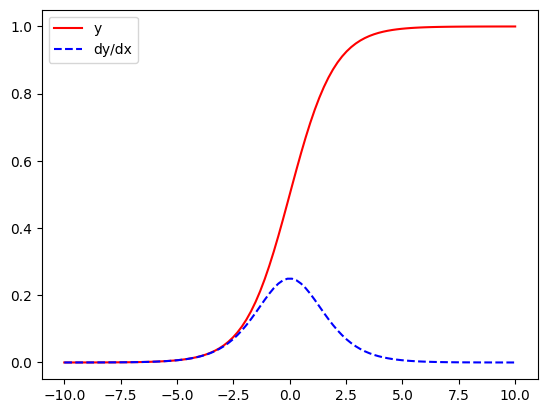

In [29]:
# linspace :  -10 ~ 10 까지의 100개 값을 가지는 텐서 만들어줌

x = tf.linspace(-10, 10, 100)

with tf.GradientTape() as tape:
    tape.watch(x) # constant이므로, watch() 함수 호출 필요
    y = tf.nn.sigmoid(x)

dx = tape.gradient(y, x)
print(dx)


import matplotlib.pyplot as plt

plt.plot(x, y, 'r', label="y")
plt.plot(x, dx, 'b--', label="dy/dx")
plt.legend()
plt.show()

# 2. 모델 만들기

In [30]:
from google.colab import files
files.upload()  # kaggle.json 업로드 창 표시

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [31]:
!kaggle datasets download pratik2901/multiclass-weather-dataset

Dataset URL: https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/91.4M [00:00<?, ?B/s]
100% 91.4M/91.4M [00:00<00:00, 1.06GB/s]


In [32]:
import os
import zipfile
import random
from shutil import copyfile, rmtree

zip_file = 'multiclass-weather-dataset.zip'
base_dir = './Multi-class Weather Dataset'
train_dir = './train'
test_dir = './test'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('.') # 현재 디렉토리에 압축해제

# 분류 디렉터리 목록
categories = ['Cloudy', 'Rain', 'Shine', 'Sunrise']

if os.path.exists(train_dir):
    rmtree(train_dir)
if os.path.exists(test_dir):
    rmtree(test_dir)

# train, test 폴더 및 하위 카테고리 폴더 생성
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

base_dir = '/content/Multi-class Weather Dataset'

# 각 카테고리별 데이터 파일 나누기
for category in categories:
    category_path = os.path.join(base_dir, category)
    files = os.listdir(category_path)

    # 데이터 섞기
    random.shuffle(files)

    # 데이터 나누기 (8:2 비율)
    split_idx = int(len(files) * 0.8)
    train_files = files[:split_idx]
    test_files = files[split_idx:]

    # 파일 복사
    for file in train_files:
        src = os.path.join(category_path, file)
        dst = os.path.join(train_dir, category, file)
        copyfile(src, dst)

    for file in test_files:
        src = os.path.join(category_path, file)
        dst = os.path.join(test_dir, category, file)
        copyfile(src, dst)

print("데이터 분리가 완료되었습니다.")

데이터 분리가 완료되었습니다.


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

In [34]:
train_generator = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True, # 좌우 반전 (데이터 증강)
    validation_split=0.2
)

test_generator = ImageDataGenerator(rescale=1/255.)

train_flow = train_generator.flow_from_directory(
    directory='train/',
    shuffle=True,
    target_size=(224, 224),
    class_mode='categorical', # 데이터 자체를 라벨을 원핫인코딩 라벨로 쓰겠다.
    batch_size=64,
    subset="training"
)

val_flow = train_generator.flow_from_directory(
    directory='train/',
    shuffle=False,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    subset="validation"
)

test_flow = test_generator.flow_from_directory(
    directory='test/',
    shuffle=False,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64
)

Found 720 images belonging to 4 classes.
Found 179 images belonging to 4 classes.
Found 226 images belonging to 4 classes.


['Shine', 'Sunrise', 'Sunrise', 'Sunrise']


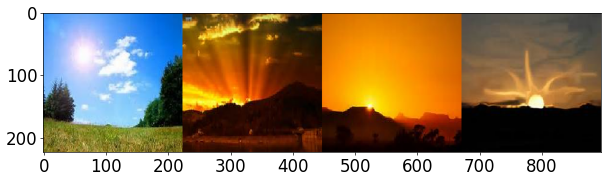

In [35]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 20})

class_names = {
  0: "Cloudy",
  1: "Rain",
  2: "Shine",
  3: "Sunrise"
}

images, targets = next(train_flow)

print([class_names[x] for x in np.argmax(targets[:4], axis=1)])
plt.imshow(np.concatenate((images[0], images[1], images[2], images[3]), axis=1))
plt.show()

In [36]:
def get_model_1():
    model = Sequential()
    model.add(layers.Input(shape=(224, 224, 3)))
    model.add(layers.Flatten()) # dimension: 224 * 224 * 3
    model.add(layers.Dense(4, activation="softmax"))
    return model


def get_model_2():
    model = Sequential()
    model.add(layers.Input(shape=(224, 224, 3)))
    model.add(layers.Flatten()) # dimension: 224 * 224 * 3
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(4, activation="softmax"))
    return model
    # 150528 * 64 = 9633792 + ()

def get_model_3():
    model = Sequential()
    model.add(layers.Input(shape=(224, 224, 3)))
    model.add(layers.Flatten()) # dimension: 224 * 224 * 3
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4, activation="softmax"))
    return model

In [43]:
model = get_model_3()
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    19,267,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,278,180 (73.54 MB)

 Trainable params: 19,278,180 (73.54 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model_1 = get_model_1()
model_1.summary()
learning_rate = 0.01

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │       602,116 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 602,116 (2.30 MB)

 Trainable params: 602,116 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# 학습 준비 단계(compile)
model_1.compile(
    optimizer=optimizers.SGD(learning_rate=learning_rate),  # 수정된 부분
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [46]:
# 학습 수행
history = model_1.fit(
    train_flow,
    epochs=20,
    validation_data=val_flow
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 643ms/step - accuracy: 0.2588 - loss: 66.1635 - val_accuracy: 0.5028 - val_loss: 35.0537
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 731ms/step - accuracy: 0.4489 - loss: 50.3236 - val_accuracy: 0.4972 - val_loss: 68.2545
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 467ms/step - accuracy: 0.5204 - loss: 47.5615 - val_accuracy: 0.6201 - val_loss: 15.0073
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 494ms/step - accuracy: 0.6245 - loss: 22.2354 - val_accuracy: 0.7318 - val_loss: 10.6938
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 438ms/step - accuracy: 0.7105 - loss: 18.2961 - val_accuracy: 0.6760 - val_loss: 12.7463
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 507ms/step - accuracy: 0.7044 - loss: 11.8562 - val_accuracy: 0.6760 - val_loss: 28.3497
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 535ms/step - accuracy: 0.7756 - loss: 9.4579 - val_accuracy: 0.6760 - val_loss: 29.8449
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 533ms/step - accuracy: 0.7079 - loss: 15.5767 - 

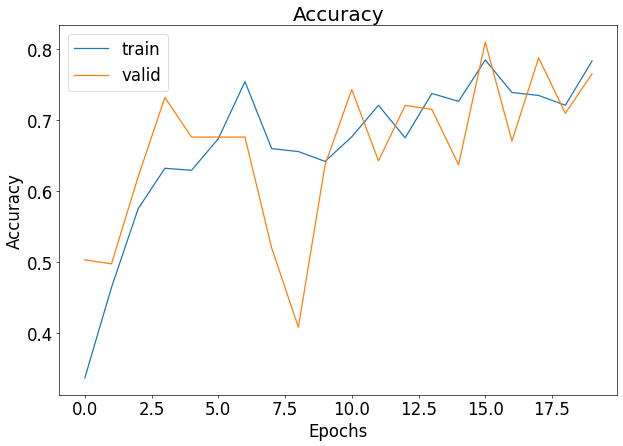

In [47]:
# 정확도 그래프
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.legend(['train', 'valid'])
plt.show()

In [48]:
# 테스트
test_history = model_1.evaluate(test_flow)
test_loss, test_accuracy = test_history

print(f"Test loss: {test_loss:.8f}")
print(f"Test accuracy: {test_accuracy * 100.:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 554ms/step - accuracy: 0.7339 - loss: 12.4192
Test loss: 12.75617695
Test accuracy: 75.66%


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │     9,633,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,634,116 (36.75 MB)

 Trainable params: 9,634,116 (36.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.3621 - loss: 4.5971 - val_accuracy: 0.3184 - val_loss: 1.3201
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 568ms/step - accuracy: 0.4226 - loss: 1.2421 - val_accuracy: 0.5140 - val_loss: 0.9929
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 476ms/step - accuracy: 0.5462 - loss: 0.9827 - val_accuracy: 0.4637 - val_loss: 1.0837
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 646ms/step - accuracy: 0.6051 - loss: 0.8592 - val_accuracy: 0.6201 - val_loss: 0.8787
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 469ms/step - accuracy: 0.5658 - loss: 0.9490 - val_accuracy: 0.6425 - val_loss: 0.8585
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 626ms/step - accuracy: 0.5710 - loss: 0.8676 - val_accuracy: 0.7318 - val_loss: 0.8211
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 495ms/step - accuracy: 0.6692 - loss: 0.7585 - val_accuracy: 0.5531 - val_loss: 0.9853
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 502ms/step - accuracy: 0.6017 - loss: 0.8788 - val_accuracy: 0.5

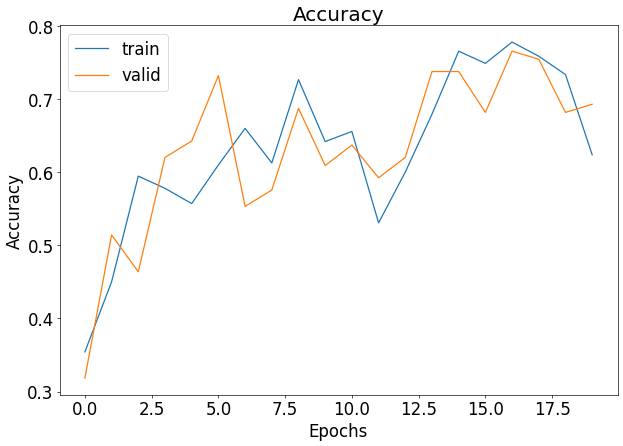

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 287ms/step - accuracy: 0.5284 - loss: 0.9313
Test loss: 0.83206087
Test accuracy: 65.04%


In [49]:
model_2 = get_model_2()
model_2.summary()
learning_rate = 0.01

# 학습 준비 단계(compile)
model_2.compile(
    optimizer=optimizers.SGD(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# 학습 수행
history = model_2.fit(
    train_flow,
    epochs=20,
    validation_data=val_flow
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.legend(['train', 'valid'])
plt.show()

# 학습된 모델 테스트
test_history = model_2.evaluate(test_flow)
test_loss, test_accuracy = test_history

print(f"Test loss: {test_loss:.8f}")
print(f"Test accuracy: {test_accuracy * 100.:.2f}%")

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │    19,267,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,278,180 (73.54 MB)

 Trainable params: 19,278,180 (73.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 725ms/step - accuracy: 0.2735 - loss: 3.1851 - val_accuracy: 0.2011 - val_loss: 1.5159
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 643ms/step - accuracy: 0.2977 - loss: 1.5316 - val_accuracy: 0.2179 - val_loss: 1.3818
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 532ms/step - accuracy: 0.3073 - loss: 1.3743 - val_accuracy: 0.3352 - val_loss: 1.3236
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 622ms/step - accuracy: 0.2501 - loss: 1.3469 - val_accuracy: 0.4022 - val_loss: 1.3643
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 542ms/step - accuracy: 0.3195 - loss: 1.3229 - val_accuracy: 0.3240 - val_loss: 1.2257
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 633ms/step - accuracy: 0.3017 - loss: 1.2865 - val_accuracy: 0.3184 - val_loss: 1.2995
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 541ms/step - accuracy: 0.3372 - loss: 1.3869 - val_accuracy: 0.5531 - val_loss: 1.1626
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 650ms/step - accuracy: 0.4131 - loss: 1.2447 - val_accuracy: 0

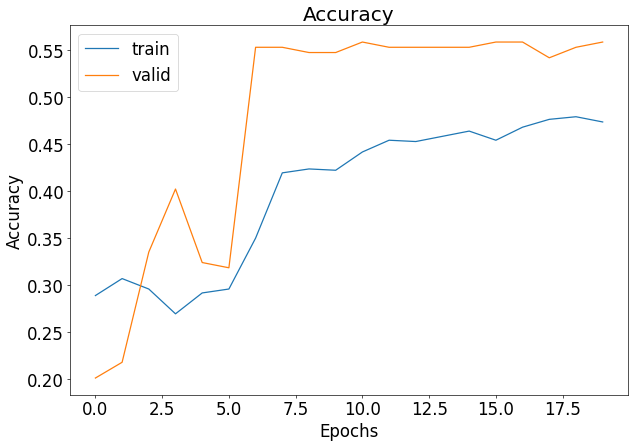

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - accuracy: 0.5929 - loss: 1.1733
Test loss: 1.03004384
Test accuracy: 54.87%


In [50]:
model_3 = get_model_3()
model_3.summary()
learning_rate = 0.01

# 학습 준비 단계(compile)
model_3.compile(
    optimizer=optimizers.SGD(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# 학습 수행
history = model_3.fit(
    train_flow,
    epochs=20,
    validation_data=val_flow
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.legend(['train', 'valid'])
plt.show()

# 학습된 모델 테스트
test_history = model_3.evaluate(test_flow)
test_loss, test_accuracy = test_history

print(f"Test loss: {test_loss:.8f}")
print(f"Test accuracy: {test_accuracy * 100.:.2f}%")